In [ ]:
Ｋ近邻模型函数说明
neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2, metric='minkowski',)
n_neighbors：用于指定近邻样本个数K，默认为5
weights：用于指定近邻样本的投票权重，默认为'uniform'，表示所有近邻样本的投票权重一样；
         如果为'distance'，则表示投票权重与距离成反比，即近邻样本与未知类别的样本点距离越远，权重越小，反之，权重越大
metric：用于指定距离的度量指标，默认为闵可夫斯基距离
p：当参数metric为闵可夫斯基距离时，p=1，表示计算点之间的曼哈顿距离；p=2，表示计算点之间的欧氏距离；该参数的默认值为2

In [21]:
# 导入第三方包
import pandas as pd
# 导入数据
Knowledge = pd.read_excel(r'Knowledge.xlsx')
# 返回前5行数据
Knowledge.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,Very Low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [22]:
# 构造训练集和测试集
# 导入第三方模块
from sklearn import model_selection
# 将数据集拆分为训练集和测试集
predictors = Knowledge.columns[:-1]
X_train, X_test, y_train, y_test = model_selection.train_test_split(Knowledge[predictors], Knowledge.UNS, 
                                                                    test_size = 0.25, random_state = 1234)

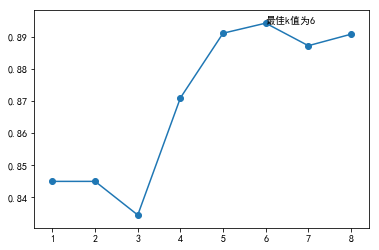

In [23]:
# 导入第三方模块
import numpy as np
from sklearn import neighbors
import matplotlib.pyplot as plt

# 设置待测试的不同k值
K = np.arange(1,np.ceil(np.log2(Knowledge.shape[0]))).astype(int)
# 构建空的列表，用于存储平均准确率
accuracy = []
for k in K:
    # 使用10重交叉验证的方法，比对每一个k值下KNN模型的预测准确率
    cv_result = model_selection.cross_val_score(neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'distance'), 
                                                X_train, y_train, cv = 10, scoring='accuracy')
    accuracy.append(cv_result.mean())

# 从k个平均准确率中挑选出最大值所对应的下标    
arg_max = np.array(accuracy).argmax()
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 绘制不同K值与平均预测准确率之间的折线图
plt.plot(K, accuracy)
# 添加点图
plt.scatter(K, accuracy)
# 添加文字说明
plt.text(K[arg_max], accuracy[arg_max], '最佳k值为%s' %int(K[arg_max]))
# 显示图形
plt.show()

In [24]:
# 导入第三方模块
from sklearn import metrics

# 重新构建模型，并将最佳的近邻个数设置为6
knn_class = neighbors.KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
# 模型拟合
knn_class.fit(X_train, y_train)
# 模型在测试数据集上的预测
predict = knn_class.predict(X_test)
# 构建混淆矩阵
cm = pd.crosstab(predict,y_test)
cm

UNS,High,Low,Middle,Very Low
row_0,,,,
High,29,0,0,0
Low,0,34,3,5
Middle,1,0,23,0
Very Low,0,0,0,6


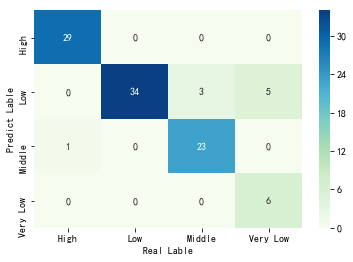

In [25]:
# 导入第三方模块
import seaborn as sns

# 将混淆矩阵构造成数据框，并加上字段名和行名称，用于行或列的含义说明
cm = pd.DataFrame(cm)
# 绘制热力图
sns.heatmap(cm, annot = True, cmap = 'GnBu')
# 添加x轴和y轴的标签
plt.xlabel('Real Lable')
plt.ylabel('Predict Lable')
# 图形显示
plt.show()

In [26]:
# 模型整体的预测准确率
metrics.scorer.accuracy_score(y_test, predict)

0.9108910891089109

In [27]:
# 分类模型的评估报告
print(metrics.classification_report(y_test, predict))

             precision    recall  f1-score   support

       High       1.00      0.97      0.98        30
        Low       0.81      1.00      0.89        34
     Middle       0.96      0.88      0.92        26
   Very Low       1.00      0.55      0.71        11

avg / total       0.93      0.91      0.91       101



In [28]:
# 读入数据
ccpp = pd.read_excel(r'CCPP.xlsx')
ccpp.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [29]:
# 返回数据集的行数与列数
ccpp.shape

(9568, 5)

In [30]:
# 导入第三方包
from sklearn.preprocessing import minmax_scale
# 对所有自变量数据作标准化处理
predictors = ccpp.columns[:-1]
X = minmax_scale(ccpp[predictors])

In [31]:
# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, ccpp.PE, 
                                                                    test_size = 0.25, random_state = 1234)

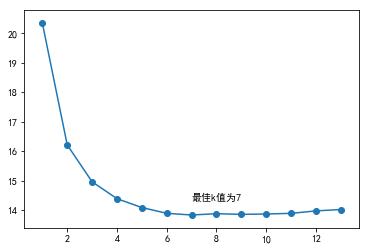

In [32]:
# 设置待测试的不同k值
K = np.arange(1,np.ceil(np.log2(ccpp.shape[0]))).astype(int)
# 构建空的列表，用于存储平均MSE
mse = []
for k in K:
    # 使用10重交叉验证的方法，比对每一个k值下KNN模型的计算MSE
    cv_result = model_selection.cross_val_score(neighbors.KNeighborsRegressor(n_neighbors = k, weights = 'distance'), 
                                                X_train, y_train, cv = 10, scoring='neg_mean_squared_error')
    mse.append((-1*cv_result).mean())

# 从k个平均MSE中挑选出最小值所对应的下标  
arg_min = np.array(mse).argmin()
# 绘制不同K值与平均MSE之间的折线图
plt.plot(K, mse)
# 添加点图
plt.scatter(K, mse)
# 添加文字说明
plt.text(K[arg_min], mse[arg_min] + 0.5, '最佳k值为%s' %int(K[arg_min]))
# 显示图形
plt.show()

In [17]:
# 重新构建模型，并将最佳的近邻个数设置为7
knn_reg = neighbors.KNeighborsRegressor(n_neighbors = 7, weights = 'distance')
# 模型拟合
knn_reg.fit(X_train, y_train)
# 模型在测试集上的预测
predict = knn_reg.predict(X_test)
# 计算MSE值
metrics.mean_squared_error(y_test, predict)

12.814094947334912

In [18]:
# 对比真实值和实际值
pd.DataFrame({'Real':y_test,'Predict':predict}, columns=['Real','Predict']).head(10)

,Real,Predict
2620,435.68,437.677598
6998,442.90,443.101594
2857,449.01,448.758681
6510,449.75,445.560046
5368,455.20,453.010541
3486,453.49,455.462162
6251,479.14,476.543251
5548,446.71,445.576955
2266,429.80,430.824836
5615,474.40,474.400000


In [19]:
# 导入第三方模块
from sklearn import tree

# 预设各参数的不同选项值
max_depth = [19,21,23,25,27]
min_samples_split = [2,4,6,8]
min_samples_leaf = [2,4,8,10,12]
parameters = {'max_depth':max_depth, 'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}
# 网格搜索法，测试不同的参数值
grid_dtreg = model_selection.GridSearchCV(estimator = tree.DecisionTreeRegressor(), param_grid = parameters, cv=10)
# 模型拟合
grid_dtreg.fit(X_train, y_train)
# 返回最佳组合的参数值
grid_dtreg.best_params_

{'max_depth': 27, 'min_samples_leaf': 10, 'min_samples_split': 6}

In [20]:
# 构建用于回归的决策树
CART_Reg = tree.DecisionTreeRegressor(max_depth = 25, min_samples_leaf = 10, min_samples_split = 4)
# 回归树拟合
CART_Reg.fit(X_train, y_train)
# 模型在测试集上的预测
pred = CART_Reg.predict(X_test)
# 计算衡量模型好坏的MSE值
metrics.mean_squared_error(y_test, pred)

16.14372022814815